# p19: Second order Wave Equation on Chebyshev Grid 

We solve
$$
u_{tt} = u_{xx}+u_{yy}, \qquad -1 < x,y < 1,   \qquad t > 0
$$
with
$$
u = 0 \qquad \mbox{on the boundary}
$$
and initial condition
$$
u(x,y,0) = e^{-40((x-0.4)^2 + y^2)}, \qquad u_{t}(x,y,0) = 0
$$

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import arange,cos,zeros,round,exp,pi
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import LineCollection
from matplotlib.pyplot import figure

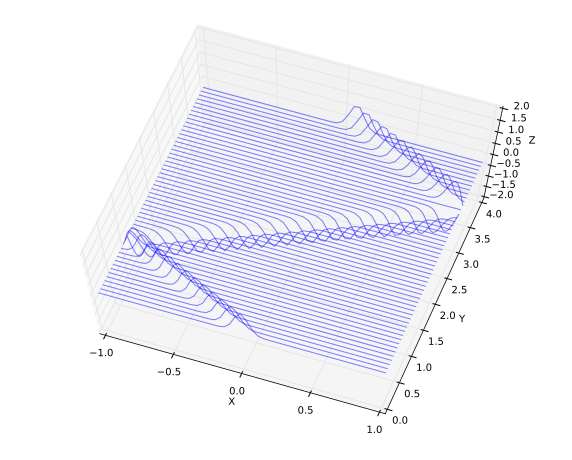

In [4]:
# Time-stepping by Leap Frog Formula:
N = 80; t = 0.0 ;x = cos(pi*arange(0,N+1)/N);dt = 8.0/(N**2);
v = exp(-200*x**2); vold = exp(-200*(x-dt)**2);
tmax = 4 ; tplot = 0.075;
plotgap = int(round(tplot/dt)); dt = tplot/plotgap;
nplots = int(round(tmax/tplot));
plotdata = [];plotdata.append(list(zip(x,v)));
tdata = zeros(nplots+1);
for i in range(1,nplots):
    for n in range(plotgap):
        t = t + dt
        w = chebfft(chebfft(v)); w[0] = 0.0 ; w[N] = 0.0; 
        vnew = 2*v - vold + dt**2*w; vold = v ; v = vnew;
    plotdata.append(list(zip(x,v)));
    tdata[i] = t;

fig = figure(figsize=(10,8))
ax = fig.gca(projection='3d')
poly = LineCollection(plotdata)
poly.set_alpha(0.5)
ax.add_collection3d(poly, zs=tdata, zdir='y')
ax.set_xlabel('X')
ax.set_xlim3d(-1, 1)
ax.set_ylabel('Y')
ax.set_ylim3d(0, tmax)
ax.set_zlabel('Z')
ax.set_zlim3d(-2, 2)
ax.view_init(70,-70)